# Image Annotation

In this notebook we will cover how to annotate images using OpenCV. We will learn how to peform the following annotations to images.

* Draw lines
* Draw circles
* Draw rectangles
* Add text

These are useful when you want to annotate your results for presentations or show a demo of your application. Annotations can also be useful during development and debugging.

## Import the libraries

In [1]:
# Import libraries
import cv2
import matplotlib
import matplotlib.pyplot as plt

# a figsize of 9x9 inches is used for all plots
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)

%matplotlib inline

## Show the image that is going to be used in this notebook

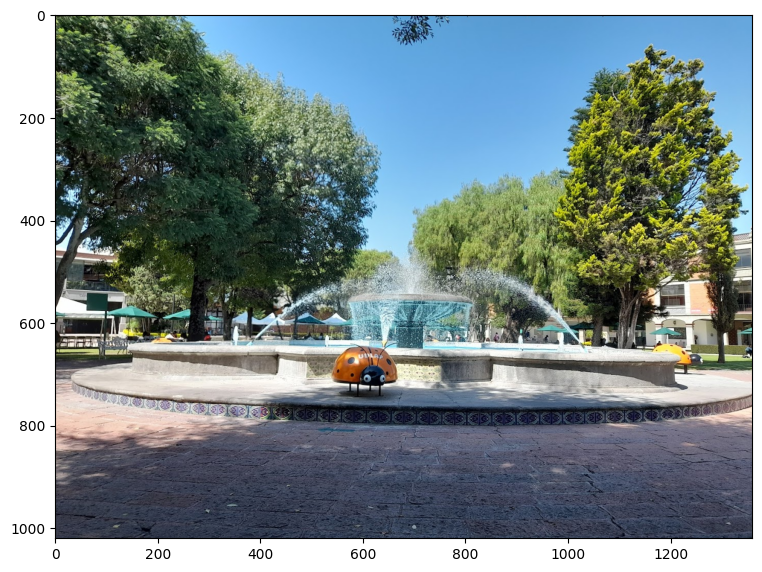

In [2]:
# Read in an image
image = cv2.imread("datos/ImageAnnotation/playita.jpg", cv2.IMREAD_COLOR)

# Convert the image to RGB (OpenCV uses BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)

## Drawing a Line


Let's start off by drawing a line on an image. We will use cv2.line function for this.

**Function Syntax**
``` python
    img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:   Image on which we will draw a line

2. `pt1`:   First point(x,y location) of the line segment

3. `pt2`:   Second point of the line segment

4. `color`: Color of the line which will be drawn
    
Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness. Default value is 1.

2. `lineType`:  Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

**Notes**

The line types avaible are the following: 

`cv2.LINE_4:`
- Draws a 4-connected line. This means the line is drawn by connecting adjacent pixels horizontally, vertically, or diagonally.
- It is faster but may produce less smooth lines.

`cv2.LINE_8:`
- Draws an 8-connected line. This allows connections in all directions (horizontal, vertical, and diagonal).
- Produces smoother lines than cv2.LINE_4.

`cv2.LINE_AA:`
- Draws a line with antialiasing, which smooths the edges of the line to make it appear less pixelated.
- It is the slowest method but produces the best visual results.

### OpenCV Documentation

**`line`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2" target="_blank">Documentation link</a>


### Example

1. `Drawing a Line in the Image:`
We can draw a line on the image at any desired location. In this case, I want to draw a horizontal line just above the ladybug to mark a specific boundary or reference point.

2. `Position of the Ladybug:`
By analyzing the image, we can determine the ladybug's position. On the y-axis, it is located between the values 600 and 700 approximately, while on the x-axis, it spans between 500 and 700. 

After experimenting with different points, I determined the optimal coordinates for the line. The line will be drawn between the following two points:

`P1`: (500, 625)

`P2`: (700, 625)

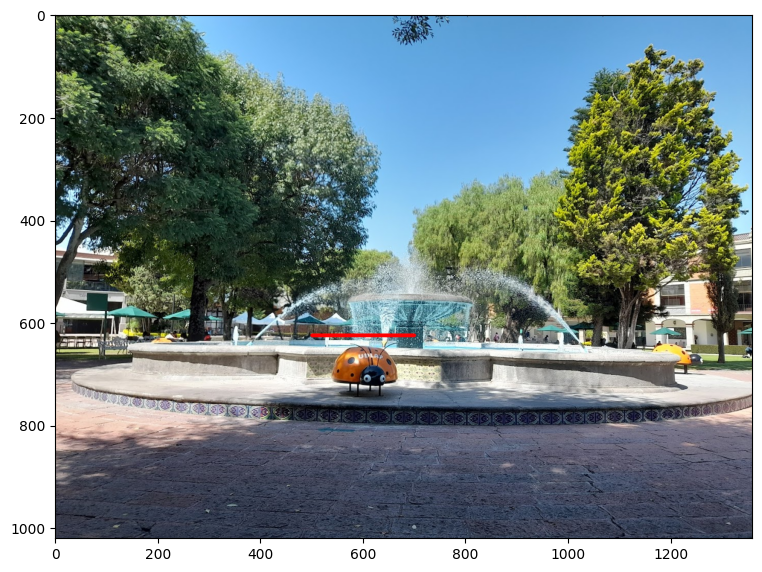

In [3]:
imageLine = image.copy()

red_color = (255, 0, 0)

P1 = (500, 625)
P2 = (700, 625)

cv2.line(imageLine, P1, P2, red_color, thickness=5, lineType=cv2.LINE_AA);

plt.imshow(imageLine)

## Drawing a Circle

Let's start off by drawing a circle on an image. We will use cv2.circle function for this.

**Functional syntx**
``` python
img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])
```

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`:    Image on which we will draw a line

2. `center`: Center of the circle

3. `radius`: Radius of the circle

4. `color`:  Color of the circle which will be drawn
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the circle outline (if positive).
If a negative value is supplied for this argument, it will result in a filled circle.

2. `lineType`:  Type of the circle boundary. This is exact same as lineType argument in **cv2.line**

### OpenCV Documentation
    
**`circle`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670" target="_blank">Documentation link</a>

### Example

Here’s an example of how to draw a circle that encloses the ladybug in an image

In this case we can see that the center of the ladybug is approximately x = 600 and y = 700 and the radius is 100

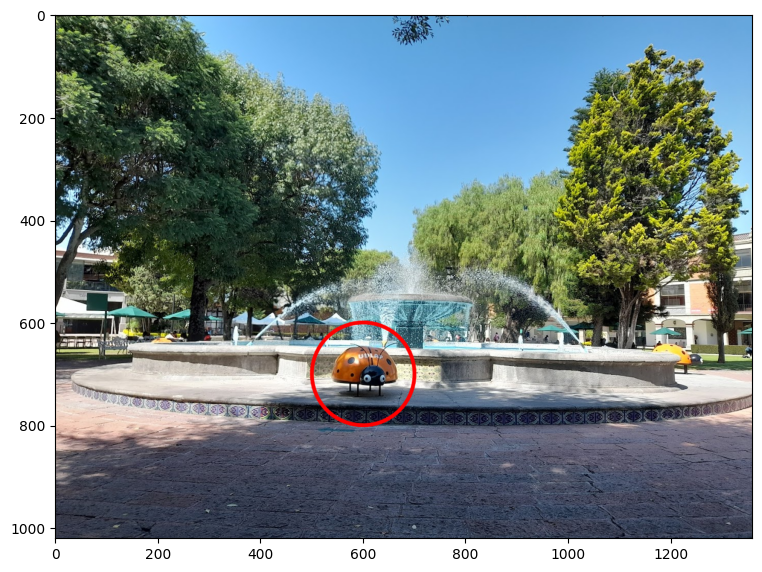

In [4]:
# Draw a circle
imageCircle = image.copy()

center = (600, 700)
radius = 100
red_color = (255, 0, 0)

cv2.circle(imageCircle, center, radius, red_color, thickness=5, lineType=cv2.LINE_AA)

# Display the image
plt.imshow(imageCircle)

## Drawing a Rectangle

We will use **cv2.rectangle** function to draw a rectangle on an image. The function syntax is as follows.

**Functional syntax**

    img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])

`img`: The output image that has been annotated.

The function has **4 required arguments**:

1. `img`: Image on which the rectangle is to be drawn.

2. `pt1`: Vertex of the rectangle. Usually we use the **top-left vertex** here.

3. `pt2`: Vertex of the rectangle opposite to pt1. Usually we use the **bottom-right** vertex here.

4. `color`: Rectangle color
    
Next, let's check out the (optional) arguments which we are going to use quite extensively.

1. `thickness`: Thickness of the rectangle outline (if positive). If a negative value is supplied for this argument, it will result in a filled rectangle.

2. `lineType`: Type of the rectangle boundary. This is exact same as lineType argument in
    **cv2.line**

### OpenCV Documentation Links

**`rectangle`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9" target="_blank">Documentation link</a>

### Example

For this example we are going to enclose the entire fountain in a rectangle

We can see that the top-left vertex is approximately x = 100 and y = 450 and the bottom-right vertex in x = 1300 and y = 750

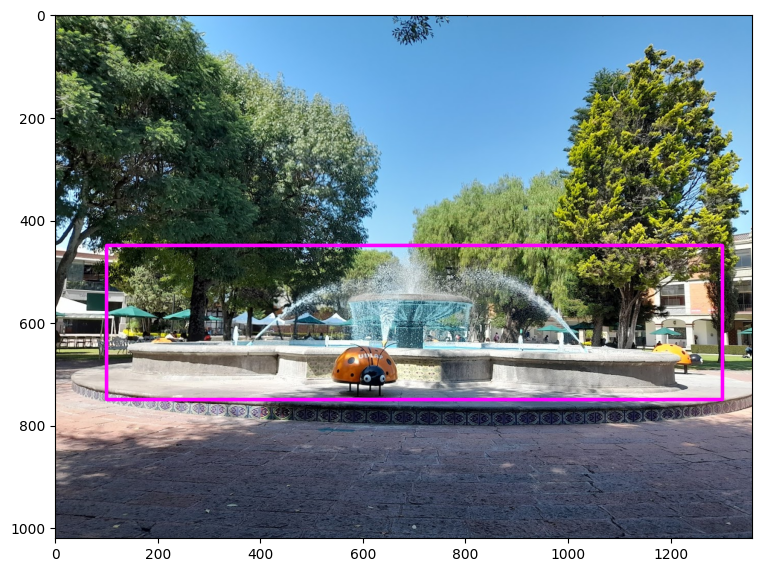

In [5]:
# Draw a rectangle (thickness is a positive integer)
imageRectangle = image.copy()

P1 = (100, 450)
P2 = (1300, 750)
purple_color = (255, 0, 255)

cv2.rectangle(imageRectangle, P1, P2, purple_color, thickness=5, lineType=cv2.LINE_8)

# Display the image
plt.imshow(imageRectangle)

## Adding Text

Finally, let's see how we can write some text on an image using **cv2.putText** function.

**Functional syntax**

    img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])

`img`: The output image that has been annotated.

The function has **6 required arguments**:

1. `img`: Image on which the text has to be written.

2. `text`: Text string to be written.

3. `org`: Bottom-left corner of the text string in the image.

4. `fontFace`: Font type

5. `fontScale`: Font scale factor that is multiplied by the font-specific base size.

6. `color`: Font color

Other optional arguments that are important for us to know include:

1. `thickness`: Integer specifying the line thickness for the text. Default value is 1.

2. `lineType`: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.

### OpenCV Documentation

**`putText`**: <a href="https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576" target="_blank">Documentation link</a>

### Example

For this example we are going to add a personalized text in the image at the top of the image

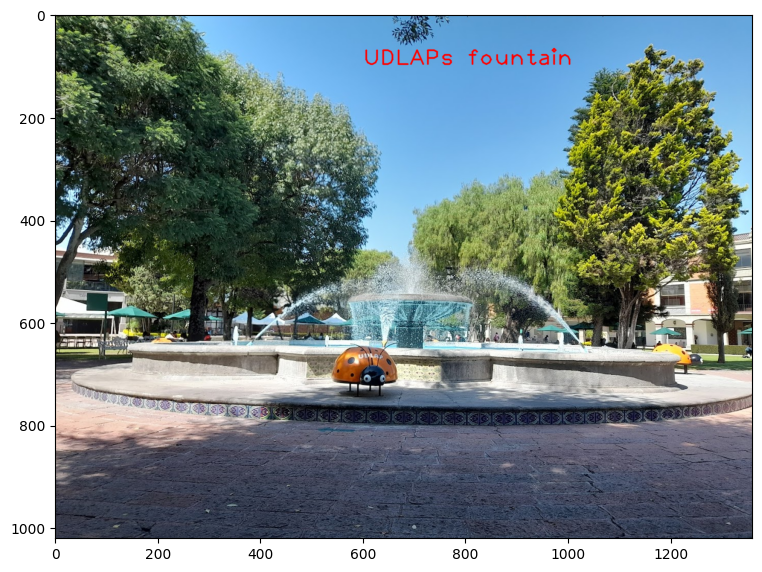

In [6]:
imageText = image.copy()
text = "UDLAPs fountain"
bottom_left_of_text = (600, 100)
fontScale = 3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (255, 0, 0)
fontThickness = 2

cv2.putText(imageText, text, bottom_left_of_text, fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA)

# Display the image
plt.imshow(imageText)